# Accessing data in multiple ERDDAP servers


This is the first post of a series on how to access data in multiple ERDDAP servers.
We already have example that "hits" a single server but thanks to EDDAP RESTful we can"re-use" the same query in any server. This post will do the "poor's man" multiple server search by just doing exactly that.
One could also use [http://erddap.com/](http://erddap.com/) or [https://coastwatch.pfeg.noaa.gov/erddap/download/SearchMultipleERDDAPs.html](https://coastwatch.pfeg.noaa.gov/erddap/download/SearchMultipleERDDAPs.html).

The [rerddap](https://cran.r-project.org/web/packages/rerddap/vignettes/Using_rerddap.html) also searches multiples ERDDAP but `erddapy` does not. The main reason was preserve the provenance of the data, by "forcing" the user to know which server the data is coming from. However, a future version may have a utilitiy function to search multiple ERDDAPs and return endpoints that could be used to obtain data.

We will use two ERDDAP servers for this notebook: the brand new [Axiom ERDDAP for OOI](http://erddap.dataexplorer.oceanobservatories.org/erddap) and the [Sensor Map ERDDAP from IOOS](http://erddap.sensors.ioos.us/erddap).

In [1]:
from erddapy import ERDDAP
protocol = "tabledap"

ooi = ERDDAP(server="http://erddap.dataexplorer.oceanobservatories.org/erddap", protocol=protocol)
ioos = ERDDAP(server="http://erddap.sensors.ioos.us/erddap", protocol=protocol)

How many dataset do we have on each one do those servers?

In [2]:
import pandas as pd


url = ooi.get_search_url(search_for="all", response="csv")
df = pd.read_csv(url)
print(
    f'We have {len(set(df["tabledap"].dropna()))} '
    f'tabledap, {len(set(df["griddap"].dropna()))} '
    f'griddap, and {len(set(df["wms"].dropna()))} wms endpoints in the OOI server.'
)

We have 540 tabledap, 0 griddap, and 0 wms endpoints in the OOI server.


In [3]:
url = ioos.get_search_url(search_for="all", response="csv")
df = pd.read_csv(url)
print(
    f'We have {len(set(df["tabledap"].dropna()))} '
    f'tabledap, {len(set(df["griddap"].dropna()))} '
    f'griddap, and {len(set(df["wms"].dropna()))} wms endpoints in the IOOS server.'
)

We have 1000 tabledap, 0 griddap, and 0 wms endpoints in the IOOS server.


Now we'll refine our search by adding temporal, bounding box and variable constraints. 

In [4]:
min_time = "2017-07-01T00:00:00Z"
max_time = "2017-09-01T00:00:00Z"
min_lon, max_lon = -127, -123.75
min_lat, max_lat = 43, 48
standard_name = "sea_water_practical_salinity"

kw = {
    "standard_name": standard_name,
    "min_lon": min_lon,
    "max_lon": max_lon,
    "min_lat": min_lat,
    "max_lat": max_lat,
    "min_time": min_time,
    "max_time": max_time,
    "cdm_data_type": "timeseries",  # let's exclude AUV's tracks
}

In [5]:
search_url = ooi.get_search_url(response="csv", **kw)
df_ooi = pd.read_csv(search_url)[["Institution", "Dataset ID", "tabledap"]]
df_ooi

,Institution,Dataset ID,tabledap
0,Ocean Observatories Initiative (OOI),ooi-ce01issm-rid16-02-flortd000,http://erddap.dataexplorer.oceanobservatories....
1,Ocean Observatories Initiative (OOI),ooi-ce01issm-rid16-03-ctdbpc000,http://erddap.dataexplorer.oceanobservatories....
2,Ocean Observatories Initiative (OOI),ooi-ce01issm-rid16-03-dostad000,http://erddap.dataexplorer.oceanobservatories....
3,Ocean Observatories Initiative (OOI),ooi-ce01issm-rid16-07-nutnrb000,http://erddap.dataexplorer.oceanobservatories....
4,Ocean Observatories Initiative (OOI),ooi-ce01issm-rid16-06-phsend000,http://erddap.dataexplorer.oceanobservatories....
...,...,...,...
58,Ocean Observatories Initiative (OOI),ooi-ce07shsm-sbd11-06-metbka000,http://erddap.dataexplorer.oceanobservatories....
59,Ocean Observatories Initiative (OOI),ooi-rs01slbs-lj01a-12-ctdpfb101,http://erddap.dataexplorer.oceanobservatories....
60,Ocean Observatories Initiative (OOI),ooi-rs01sbps-pc01a-4c-flordd103,http://erddap.dataexplorer.oceanobservatories....
61,Ocean Observatories Initiative (OOI),ooi-rs01sbps-pc01a-4a-ctdpfa103,http://erddap.dataexplorer.oceanobservatories....


In [6]:
search_url = ioos.get_search_url(response="csv", **kw)
df_ioos = pd.read_csv(search_url)[["Institution", "Dataset ID", "tabledap"]]
df_ioos

,Institution,Dataset ID,tabledap
0,Center for Coastal Margin Observation & Predic...,org_cmop_46096,http://erddap.sensors.ioos.us/erddap/tabledap/...
1,Observing System Monitoring Center (OSMC),osmc_46097,http://erddap.sensors.ioos.us/erddap/tabledap/...
2,Observing System Monitoring Center (OSMC),osmc_46098,http://erddap.sensors.ioos.us/erddap/tabledap/...
3,Observing System Monitoring Center (OSMC),osmc_46099,http://erddap.sensors.ioos.us/erddap/tabledap/...
4,Observing System Monitoring Center (OSMC),osmc_46100,http://erddap.sensors.ioos.us/erddap/tabledap/...
5,NOAA National Data Buoy Center (NDBC),wmo_46116,http://erddap.sensors.ioos.us/erddap/tabledap/...
6,Northwest Association of Networked Ocean Obser...,nanoos_apl_chaba,http://erddap.sensors.ioos.us/erddap/tabledap/...
7,Northwest Association of Networked Ocean Obser...,nanoos_apl_nemo,http://erddap.sensors.ioos.us/erddap/tabledap/...
8,NOAA Center for Operational Oceanographic Prod...,noaa_nos_co_ops_9432780,http://erddap.sensors.ioos.us/erddap/tabledap/...
9,NOAA Center for Operational Oceanographic Prod...,noaa_nos_co_ops_9437540,http://erddap.sensors.ioos.us/erddap/tabledap/...


We found 68 datasets in the OOI server and 8 in the IOOS server with those constraints.

In [7]:
from joblib import Parallel, delayed
import multiprocessing


def request_positions(e, dataset_id):
    e.constraints = None
    e.protocol = "tabledap"
    e.variables = ["longitude", "latitude"]
    e.dataset_id = dataset_id
    download_url = e.get_download_url(response="csvp", distinct=True)
    df = pd.read_csv(download_url)
    pos = df.values.squeeze().tolist()
    return pos


num_cores = multiprocessing.cpu_count()

ioos_positions = Parallel(n_jobs=num_cores)(
    delayed(request_positions)(ioos, dataset_id) for dataset_id in df_ioos["Dataset ID"]
)

ooi_positions = Parallel(n_jobs=num_cores)(
    delayed(request_positions)(ooi, dataset_id) for dataset_id in df_ooi["Dataset ID"]
)

In [8]:
df_ioos["pos"] = ioos_positions
df_ooi["pos"] = ooi_positions

In [9]:
from ipyleaflet import AwesomeIcon, Marker, Map, LegendControl, FullScreenControl, Popup, Polyline, Rectangle
from ipywidgets import HTML
import numpy as np


colors = {
    "IOOS": "blue",
    "OOI": "orange",
}


legend = LegendControl(
    colors,
    name="Dataset locationsfunds",
    position="bottomright",
)


def make_track(pos, color):
    pos = np.array(pos)
    lat, lon = pos[:, 1].tolist(), pos[:, 0].tolist()
    line = Polyline(
        locations = list(zip(lat, lon)),
        color=color,
        fill=False,
    )
    return line


def make_popup(row):
    classes = "table table-striped table-hover table-condensed table-responsive"
    return pd.DataFrame(row[["Institution", "Dataset ID"]]).to_html(
        classes=classes
    )

In [10]:
m = Map(center=(min_lat, max_lon), zoom=4)
m.add_control(FullScreenControl())
m.add_control(legend)

rectangle = Rectangle(
    bounds=((min_lat, min_lon), (max_lat, max_lon)),
    color="red",
    fill=False,
)
m.add_layer(rectangle)

In [11]:
# IOOS
for k, row in df_ioos.iterrows():
    pos = row["pos"]
    if len(pos) == 2:
        lon, lat = pos
        marker = Marker(
            draggable=True,
            icon=AwesomeIcon(name="life-ring", marker_color=colors["IOOS"]),
            location=(lat, lon),
        )
    else:
        marker = make_track(pos, color=colors["IOOS"])
    msg = HTML()
    msg.value = make_popup(row)
    marker.popup = msg
    m.add_layer(marker)

In [12]:
# OOI
for k, row in df_ooi.iterrows():
    pos = row["pos"]
    if len(pos) == 2:
        lon, lat = pos
        marker = Marker(
            draggable=False,
            icon=AwesomeIcon(name="life-ring", marker_color=colors["OOI"]),
            location=(lat, lon),
        )
    else:
        marker = make_track(pos, color=colors["OOI"])
    msg = HTML()
    msg.value = make_popup(row)
    marker.popup = msg
    m.add_layer(marker)

In [13]:
m

Map(center=[43, -123.75], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

Let's get the datasets that are closest to each other for a comparison plot.

In [14]:
import seawater as sw


dist = 1e3
for k_i, pos_i in df_ioos["pos"].items():
    for k_o, pos_o in df_ooi["pos"].items():
        lats = pos_i[1], pos_o[1]
        lons = pos_i[0], pos_o[0]
        new_dist, angle = sw.dist(lats, lons)
        if new_dist < dist:
            dist = new_dist
            idx = (k_i, k_o)

In [15]:
dataset_id = df_ioos.iloc[idx[0]]["Dataset ID"]


ioos.dataset_id = dataset_id
ioos.constraints = {"time>=": min_time,"time<=": max_time}
ioos.response = "csv"
ioos.variables = [ "time", ioos.get_var_by_attr(dataset_id=dataset_id, standard_name=standard_name)[0]]


sal_ioos = ioos.to_pandas()

In [16]:
dataset_id = df_ooi.iloc[idx[1]]["Dataset ID"]


ooi.dataset_id = dataset_id
ooi.constraints = {"time>=": min_time,"time<=": max_time}
ooi.response = "csv"
ooi.variables = [ "time", ooi.get_var_by_attr(dataset_id=dataset_id, standard_name=standard_name)[0]]


sal_ooi = ooi.to_pandas()

In [17]:
def make_time_index(df):
    df["time (UTC)"] = pd.to_datetime(df["time (UTC)"])
    return df.set_index("time (UTC)")

In [18]:
sal_ioos = make_time_index(sal_ioos)
sal_ooi = make_time_index(sal_ooi)

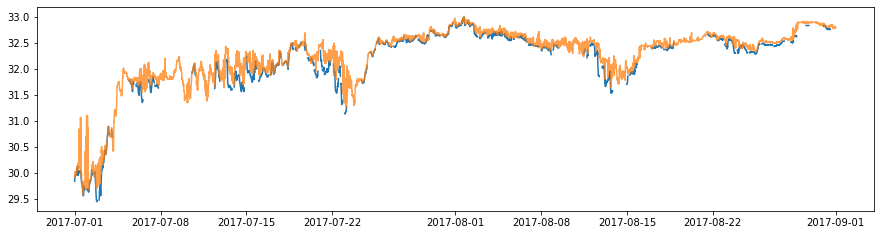

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


fig, ax = plt.subplots(figsize=(15, 3.75))
ax.plot(sal_ioos.index, sal_ioos, label="IOOS")
ax.plot(sal_ooi.index, sal_ooi, label="OOI", alpha=0.75);

This kind of multiple server search can be useful when one is evaluating the QA/QC of a site with a nearby observation, or just trying to obtain all observations available in the region of interest.